# MNIST digits

Training NN for image recognition of digits. 

# Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf

# Setting random seeds to get reproducible results
np.random.seed(0)
import tensorflow as tf
tf.random.set_seed(1)

from tensorflow.keras.utils import to_categorical
#import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
#from tensorflow.keras.layers import Dense, Dropout, Activation
#from tensorflow.keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict


ModuleNotFoundError: No module named 'numpy'

# Load data

As an alternative, we can load the MNIST dataset from the following source:

```py
import mnist

x_train, y_train = mnist.train_images(), mnist.train_labels()
x_test, y_test = mnist.test_images(), mnist.test_labels()
```

MNIST can also be fetched from sklearn.datasets:
```py
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

# This dataset is already shuffled into train set (first 60k images) and test set (last 60k images)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
```

Subsequently, it would have had to be processed in the way identical to the one described in this notebook (i.e., reshape, normalize by dividing by 256)

In [2]:
# Get the data
# TRAIN-TEST split
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print(f"Size of the training set: {len(x_train):,}")
print(f"Size of the testing set: {len(x_test):,}")

Size of the training set: 60,000
Size of the testing set: 10,000


In [3]:
# Our features are matrices representing 28x28 images, 
# with each pixel representing black-white pixel with intensity 0-255
# Let's check one of the images' dimensions:
print( x_train[1].shape )
x_train[1]

(28, 28)


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [4]:
# Labels:
print( y_train[:10] )
print( y_train[0] )
print( y_train[0].shape )
y_train[0]

[5 0 4 1 9 2 1 3 1 4]
5
()


5

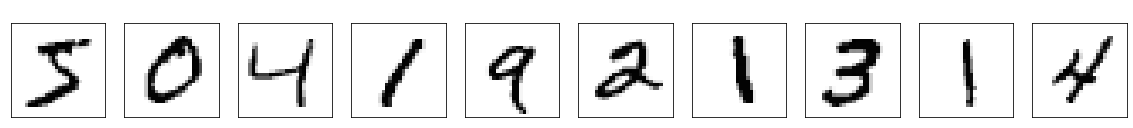

In [5]:
# Show examples 1

fig = plt.figure(figsize=(20,20))
number = 10
for i in range(number):
	ax = fig.add_subplot(1, number, i+1, xticks=[], yticks=[])
	ax.imshow(x_train[i], cmap='Greys')
	ax.set_title(f'Label: {str(y_train[i])}', color='white')


(84, 280)


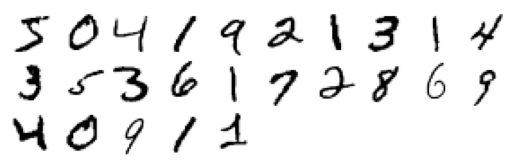

In [6]:
# Show examples 2

def plot_digits(instances, images_per_row=10):
    plt.figure(figsize=(9,9))
    size=28
    images_per_row = min( len(instances), images_per_row )
    n_rows = (len(instances)-1) // images_per_row +1
    # Append empty images to fill the end of the grid, if needed
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size, size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    print(big_image.shape)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = 'Greys')
    plt.axis("off")

example_images = x_train[:25]
plot_digits(example_images, images_per_row=10)


In [7]:
# The data is from online, it's a very popular dataset, and due to the nature of the data, there is nothing to clean. 

# Therefore, the data cleaning step is skipped.


# Pre-processing

In [8]:
# First, let's reshape the features.
# Right now, they are in the form of numpy matrix (28*28)
# Let's reshape it to a 28*28=784 -long array
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)
(x_train[0].shape) # a 28*28 matrix becomes a 784-long array

x_train = x_train / 256
x_test = x_test / 256
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [9]:
print("Features")
print(type(x_train))
print(x_train.shape)

Features
<class 'numpy.ndarray'>
(60000, 784)


In [10]:
y_train
type(y_train)

numpy.ndarray

In [11]:
# Process labels as per the special requirements of Tensorflow, 
# to accommodate for 10 features

for i in range(3):
	print(f"Before: {y_train[i]} | shape: {y_train[i].shape}")


y_train2 = to_categorical(y_train, 10)
y_test2 = to_categorical(y_test, 10)


for i in range(3):
	print(f"After: {y_train2[i]} | shape: {y_train2[i].shape}")

Before: 5 | shape: ()
Before: 0 | shape: ()
Before: 4 | shape: ()
After: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] | shape: (10,)
After: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] | shape: (10,)
After: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] | shape: (10,)


# Train model 1 - Sklearn

The Sklearn NN will have the following properties:
- 28px * 28px = 784 neurons (input layer)

## SGDClassifier

In [12]:
y_train.shape

(60000,)

In [13]:
from sklearn.linear_model import SGDClassifier


sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(x_train, y_train)


SGDClassifier(random_state=42)

In [14]:
sgd_clf.predict([x_test[0]])

array([7], dtype=uint8)

In [15]:
print(sgd_clf.classes_)
# In this case, classes and indices coincide

for i in range(5):
    print("----")
    print(f" Real: {y_test[i]}")
    prediction = sgd_clf.predict([x_test[i]])
    print(f" Predicted: {prediction}")
    some_digit_scores = sgd_clf.decision_function([x_test[i]])
    print(some_digit_scores)


[0 1 2 3 4 5 6 7 8 9]
----
 Real: 7
 Predicted: [7]
[[ -6.32302483 -15.71367925  -4.43156774  -2.36378371  -8.55695549
   -4.86485291 -12.62323215   3.26736358  -6.73744914  -5.27613252]]
----
 Real: 2
 Predicted: [2]
[[ -3.85840155  -9.8099386    3.613384    -3.93200245 -20.79294236
   -1.81866898  -2.2521538  -19.62385684  -6.09658559 -16.11255047]]
----
 Real: 1
 Predicted: [1]
[[-10.28234867   1.8048577   -1.47309026  -2.7690317   -4.75225013
   -2.36582458  -3.02051798  -2.86598612  -3.49478479  -4.22849084]]
----
 Real: 0
 Predicted: [0]
[[  3.88500163 -14.79540332  -3.78302275  -6.84682169 -11.71998675
   -6.33365234  -2.35540195  -4.84900691  -6.37879251  -7.36252312]]
----
 Real: 4
 Predicted: [4]
[[-4.77248909 -9.4344522  -3.37108689 -8.82318071  2.05405304 -6.60461336
  -4.90701578 -3.10424757 -4.20516595 -3.35696888]]


In [16]:
cross_val_score( sgd_clf, x_train, y_train, cv=3, scoring="accuracy" )

array([0.9078 , 0.90365, 0.90875])

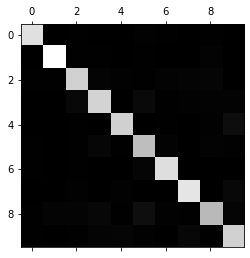

In [17]:
### This confusion matrix can be used for other algorithms, too

y_train_pred = cross_val_predict(sgd_clf, x_train, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

# The 5s look slightly darker than the other digits, which could mean that there are fewer images of 5s in the dataset or 
# that the classifier does not perform as well on 5s as on other digits
plt.matshow( conf_mx, cmap=plt.cm.gray )

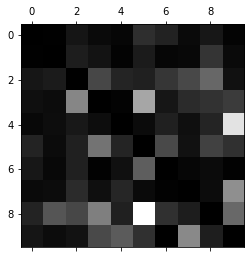

In [18]:
# coonfusion matrix, but only show errors (white - higher density of errors)
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

## Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(x_train, y_train)


RandomForestClassifier(random_state=42)

In [20]:
forest_clf

print(forest_clf.classes_)
# In this case, classes and indices coincide

for i in range(5):
    print("----")
    print(f" Real: {y_test[i]}")
    prediction = forest_clf.predict([x_test[i]])
    print(f" Predicted: {prediction}")
    some_digit_scores = forest_clf.predict_proba([x_test[i]])
    print(some_digit_scores)

[0 1 2 3 4 5 6 7 8 9]
----
 Real: 7
 Predicted: [7]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
----
 Real: 2
 Predicted: [2]
[[0.01 0.01 0.85 0.06 0.   0.01 0.04 0.   0.02 0.  ]]
----
 Real: 1
 Predicted: [1]
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
----
 Real: 0
 Predicted: [0]
[[0.96 0.   0.   0.   0.02 0.   0.01 0.   0.   0.01]]
----
 Real: 4
 Predicted: [4]
[[0.   0.   0.   0.   0.94 0.   0.   0.02 0.   0.04]]


In [21]:
cross_val_score( forest_clf, x_train, y_train, cv=3, scoring="accuracy" )

array([0.9646 , 0.96255, 0.9666 ])

## NN

In [22]:
# (x_train, y_train2), (x_test, y_test2) = keras.datasets.mnist.load_data()
# x_train = x_train.reshape(-1, 28*28)
# x_test = x_test.reshape(-1, 28*28)
# x_train = x_train / 256
# x_test = x_test / 256

In [23]:
# Let's start with the already pre-processed x_train, y_train

clf = MLPClassifier(
	solver='adam', 
	activation='relu', 
	hidden_layer_sizes=(64,64)) # two hidden layers 64x64; can also be 1 hidden layer with 50 neurons = (50,)

clf.fit(x_train, y_train)



MLPClassifier(hidden_layer_sizes=(64, 64))

Accuracy: [[ 969    0    1    1    0    0    3    0    4    2]
 [   0 1124    3    2    0    0    2    1    3    0]
 [   3    1 1007    3    3    0    2    5    8    0]
 [   0    0    3  987    0    6    0    5    5    4]
 [   1    0    4    1  960    0    4    2    0   10]
 [   2    0    0    4    2  869    8    1    3    3]
 [   4    3    1    1    5    5  937    0    2    0]
 [   2    4    8    4    1    0    0  998    6    5]
 [   3    1    2    8    6    2    6    2  939    5]
 [   2    3    0    7    8    2    1    5    3  978]]


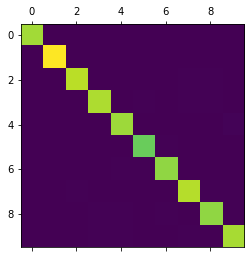

In [24]:
prediction = clf.predict(x_test)
acc = confusion_matrix(y_test, prediction)
print(f"Accuracy: {acc}")
plt.matshow(acc)

In [25]:
print(f"Training set score: {clf.score(x_train, y_train)}")
print(f"Test set score: {clf.score(x_test, y_test)}")

Training set score: 1.0
Test set score: 0.9768


1_1.png
Label: 1 | prediction: [1]


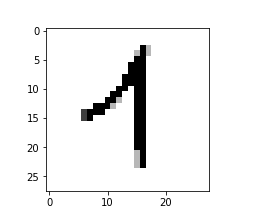

1_2.png
Label: 1 | prediction: [1]


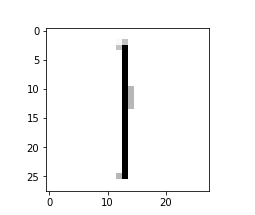

Digit_one.png
Label: 1 | prediction: [2]


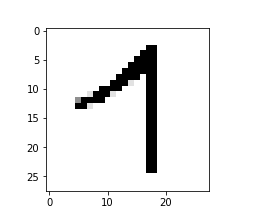

2_1.png
Label: 2 | prediction: [2]


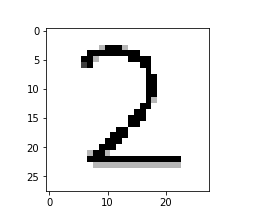

Digit_two.png
Label: 2 | prediction: [2]


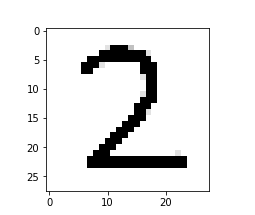

3_1.png
Label: 3 | prediction: [3]


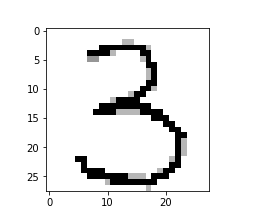

Digit_four.png
Label: 4 | prediction: [4]


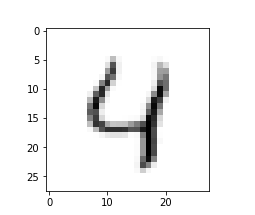

Digit_five (2).png
Label: 5 | prediction: [5]


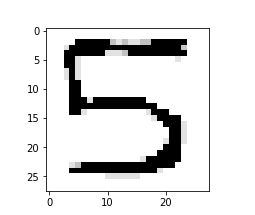

Digit_five.png
Label: 5 | prediction: [5]


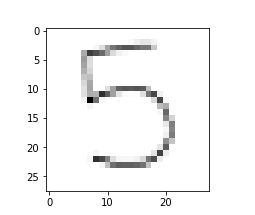

In [26]:
def read_image(file_path):
	""" Read one image from a path """
	img = Image.open(file_path)
	img = img.convert("L")
	img = img.resize((28,28))
	data = list(img.getdata())
	for i in range(len(data)):
		data[i] = 255 - data[i]
	data = [data]
	data = np.array(data)/256
	return data

folders = os.listdir('Media/Test')
number = 9; counter = 1
# fig = plt.figure(figsize=(20,20))
for i in folders:
	images = os.listdir(f"Media/Test/{i}")
	for j in images:
		# Prediction
		image_data = read_image(f"Media/Test/{i}/{j}")
		# predictions_vector = model.predict(image_data)
		# predictions = [ np.argmax(i) for i in predictions_vector ]
		predictions = clf.predict(image_data)
		print(j)
		print(f"Label: {i} | prediction: {predictions}")
		# Graph
		# fig.add_subplot(1, number, counter, xticks=[], yticks=[])
		plt.figure(figsize=(3,3))
		plot = image_data.reshape(28,28)
		plt.imshow(plot, cmap='Greys')
		plt.title(f'Label: {i} | prediction: {predictions}', color='white', size=20)
		plt.show()
		counter += 1

# Train model 2 - Keras (tensorflow)

In [27]:
# Building the model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(28*28,)))
model.add(Dropout(.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(10, activation='softmax')) # Output layer

# Compiling the model
model.compile(
	loss = 'categorical_crossentropy', 
	optimizer='adam', 
	metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [28]:
y_train2

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [29]:
model.fit( x_train, y_train2, epochs=15, batch_size=10 )

Epoch 1/15
6000/6000 [==============================] - 7s 1ms/step - loss: 0.2880 - accuracy: 0.9146
Epoch 2/15
6000/6000 [==============================] - 7s 1ms/step - loss: 0.1558 - accuracy: 0.9543
Epoch 3/15
6000/6000 [==============================] - 7s 1ms/step - loss: 0.1259 - accuracy: 0.9625
Epoch 4/15
6000/6000 [==============================] - 7s 1ms/step - loss: 0.1101 - accuracy: 0.9676
Epoch 5/15
6000/6000 [==============================] - 7s 1ms/step - loss: 0.0984 - accuracy: 0.9700
Epoch 6/15
6000/6000 [==============================] - 7s 1ms/step - loss: 0.0895 - accuracy: 0.9731
Epoch 7/15
6000/6000 [==============================] - 7s 1ms/step - loss: 0.0853 - accuracy: 0.9744
Epoch 8/15
6000/6000 [==============================] - 7s 1ms/step - loss: 0.0780 - accuracy: 0.9767
Epoch 9/15
6000/6000 [==============================] - 7s 1ms/step - loss: 0.0752 - accuracy: 0.9773
Epoch 10/15
6000/6000 [==============================] - 7s 1ms/step - loss: 0.071

## Test

In [30]:
print(x_test.shape)

(10000, 784)


In [31]:
# Check overall accuracy on the test set
score = model.evaluate( x_test, y_test2 )
print(f"Test loss: {score[0]:.2f}")
print(f"Test accuracy: {score[1]:.2f}")

313/313 [==============================] - 0s 918us/step - loss: 0.0884 - accuracy: 0.9798
Test loss: 0.09
Test accuracy: 0.98


313/313 [==============================] - 0s 878us/step


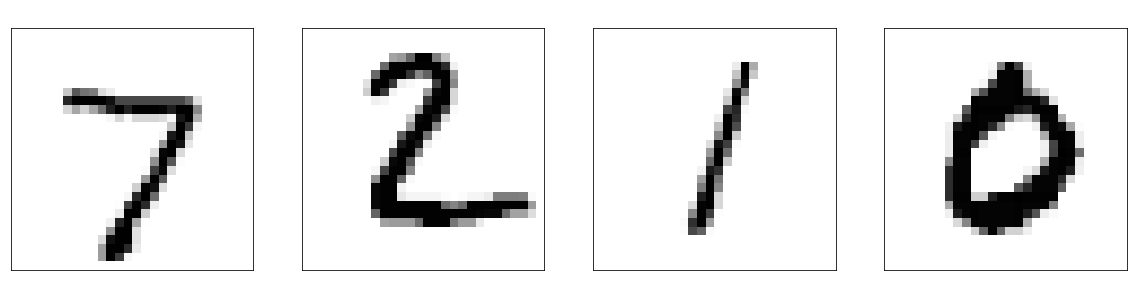

In [32]:
# Let us also check some individual predictions and their accuracy
predictions_vector = model.predict(x_test)
predictions = [ np.argmax(i) for i in predictions_vector ]

fig = plt.figure(figsize=(20,20))
number = 4
for i in range(number):
	fig.add_subplot(1, number, i+1, xticks=[], yticks=[])
	plot = x_test[i].reshape(28,28)
	plt.imshow(plot, cmap='Greys')
	plt.title(f'Label: {np.argmax(y_test2[i])} | prediction: {predictions[i]}', color='white', size=20)

1/1 [==============================] - 0s 24ms/step
1_1.png
Label: 1 | prediction: [4]


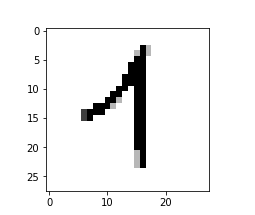

1/1 [==============================] - 0s 24ms/step
1_2.png
Label: 1 | prediction: [1]


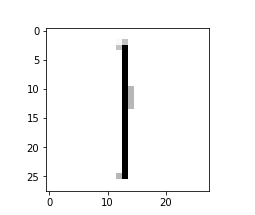

1/1 [==============================] - 0s 18ms/step
Digit_one.png
Label: 1 | prediction: [7]


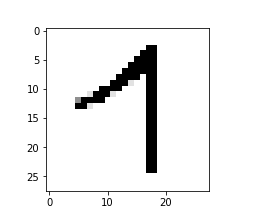

1/1 [==============================] - 0s 20ms/step
2_1.png
Label: 2 | prediction: [2]


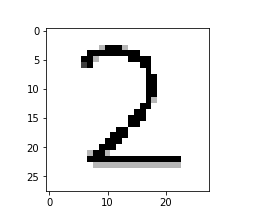

1/1 [==============================] - 0s 16ms/step
Digit_two.png
Label: 2 | prediction: [2]


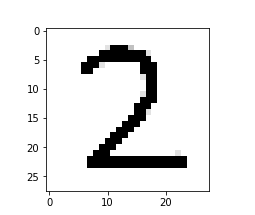

1/1 [==============================] - 0s 17ms/step
3_1.png
Label: 3 | prediction: [3]


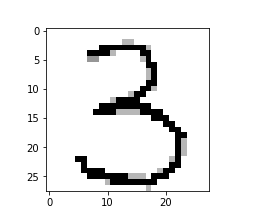

1/1 [==============================] - 0s 15ms/step
Digit_four.png
Label: 4 | prediction: [4]


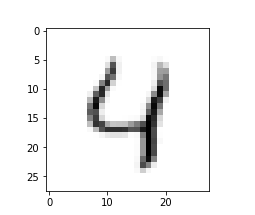

1/1 [==============================] - 0s 15ms/step
Digit_five (2).png
Label: 5 | prediction: [5]


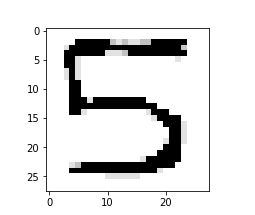

1/1 [==============================] - 0s 16ms/step
Digit_five.png
Label: 5 | prediction: [9]


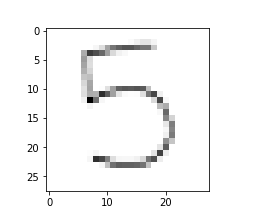

In [33]:
# # We can also load some custom images to test

def read_image(file_path):
	""" Read one image from a path """
	img = Image.open(file_path)
	img = img.convert("L")
	img = img.resize((28,28))
	data = list(img.getdata())
	for i in range(len(data)):
		data[i] = 255 - data[i]
	data = [data]
	data = np.array(data)/256
	return data

folders = os.listdir('Media/Test')
number = 9; counter = 1
# fig = plt.figure(figsize=(20,20))
for i in folders:
	images = os.listdir(f"Media/Test/{i}")
	for j in images:
		# Prediction
		image_data = read_image(f"Media/Test/{i}/{j}")
		predictions_vector = model.predict(image_data)
		predictions = [ np.argmax(i) for i in predictions_vector ]
		predictions
		print(j)
		print(f"Label: {i} | prediction: {predictions}")
		# Graph
		# fig.add_subplot(1, number, counter, xticks=[], yticks=[])
		plt.figure(figsize=(3,3))
		plot = image_data.reshape(28,28)
		plt.imshow(plot, cmap='Greys')
		plt.title(f'Label: {i} | prediction: {predictions}', color='white', size=20)
		plt.show()
		counter += 1

In [34]:
"""
As we can see, the predictions are very accurate. 

The times when it is not accurate are with 1s (ones), which is likely due to 
the MNIST dataset containing ones written as a stick without the smaller stick.

For this, later I could implement a DL model based on my own writings. 
"""

'\nAs we can see, the predictions are very accurate. \n\nThe times when it is not accurate are with 1s (ones), which is likely due to \nthe MNIST dataset containing ones written as a stick without the smaller stick.\n\nFor this, later I could implement a DL model based on my own writings. \n'